<a href="https://colab.research.google.com/github/Sabri-blm/British-Airways-analysis/blob/main/British_airways_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from tqdm.notebook import tqdm

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A simple story with an unfor...
1,✅ Trip Verified | Flight was delayed due to t...
2,Not Verified | Fast and friendly check in (to...
3,✅ Trip Verified | I don't understand why Brit...
4,Not Verified | I'm sure that BA have graduall...


In [ ]:
# Expand the view so that we can read the text
pd.set_option('display.max_colwidth', None)
df.iloc[0]

reviews    ✅ Trip Verified | A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ticket I contacted BA's 'Commercial Change Booki

In [ ]:
# Saving the data to csv file
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
# Creating a copy to work on it
clean_df = df.copy()
clean_df.head()

,reviews
0,"✅ Trip Verified | A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ticket I contacted BA's 'Commercial Change Booking Team' and informed them of our situation. The service representative apologised and told me they could have changed the name at the cost of a small fee. He offered to cancel my original ticket and issue me a partial refund then, advising me that I had a claim to the difference and I should contact Customer Support to do so. I told this person several times I wanted to claim the cost of the new ticket and even asked him explicitly if by accepting this offer, I would be denied from claiming the cost of the new ticket. He said no, I could claim the difference. Fair enough - we accepted this offer and lodged a ticket with Customer Support for the difference. Two days later, British Airways Customer Response informed us that we were unable to lodge a claim because we had 'voluntarily accepted the cancellation before the flight'. They've continued to send generic emails until this week, when they just stopped responding. So in short, British Airways misled and deceived my partner into accepting a lowball offer to waive our right to claim a refund. It keeps me up at night thinking how they can do this and get away with it so easily."
1,"✅ Trip Verified | Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time."
2,"Not Verified | Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up the global stock? The crew were always ready to top up drinks although white wine and beers were lukewarm. The crew explained that the carts are supposed to be chilled - from experience they rarely are. Is dry ice so expensive that BA can't afford it?"
3,"✅ Trip Verified | I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they are not attentive enou

In [ ]:
# Create a verified column to check if the review is verified or not (real).
clean_df["verified"] = clean_df["reviews"].apply(lambda x : 1 if (x.split("|")[0].split(" ")[1] == 'Trip') else 0)

# Remove the verified tag from the review
clean_df["reviews"] = clean_df["reviews"].apply(lambda x : x.split(" | ")[1] if (len(x.split(" | ")) > 1) else x)

clean_df.head()



---



---


### idea's:
to reduce potential deception through increased authentication

verifiyed : authentic review

unverifiyed : take into consideration that this might be a case where the person who left a review didn't take the flight

In [ ]:
# Functions to get the polarity and the subjectivity of the reviews
def get_sub(text):
  return TextBlob(text).sentiment.subjectivity

def get_pol(text):
  return TextBlob(text).sentiment.polarity

# Storing the result in two columns
clean_df["subjectivity"] = clean_df["reviews"].apply(get_sub)
clean_df["polarity"] = clean_df["reviews"].apply(get_pol)

clean_df

,reviews,verified,subjectivity,polarity
0,"A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ticket I contacted BA's 'Commercial Change Booking Team' and informed them of our situation. The service representative apologised and told me they could have changed the name at the cost of a small fee. He offered to cancel my original ticket and issue me a partial refund then, advising me that I had a claim to the difference and I should contact Customer Support to do so. I told this person several times I wanted to claim the cost of the new ticket and even asked him explicitly if by accepting this offer, I would be denied from claiming the cost of the new ticket. He said no, I could claim the difference. Fair enough - we accepted this offer and lodged a ticket with Customer Support for the difference. Two days later, British Airways Customer Response informed us that we were unable to lodge a claim because we had 'voluntarily accepted the cancellation before the flight'. They've continued to send generic emails until this week, when they just stopped responding. So in short, British Airways misled and deceived my partner into accepting a lowball offer to waive our right to claim a refund. It keeps me up at night thinking how they can do this and get away with it so easily.",1,0.419648,0.049331
1,"Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time.",1,0.523901,0.004029
2,"Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up the global stock? The crew were always ready to top up drinks although white wine and beers were lukewarm. The crew explained that the carts are supposed to be chilled - from experience they rarely are. Is dry ice so expensive that BA can't afford it?",0,0.579167,0.315104
3,"I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they 

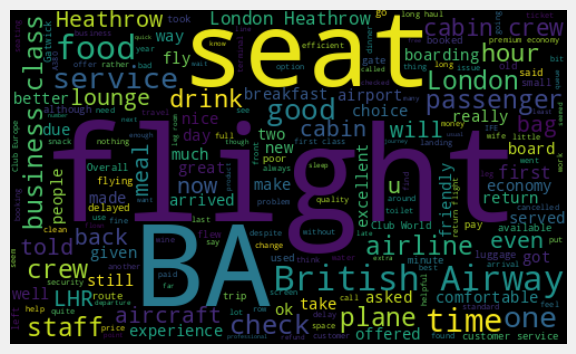

In [ ]:
# Creating a wordcloud to identify the most frequant words
all_words = ' '.join([rev for rev in clean_df["reviews"]])

wordcloud = WordCloud(width=500, height=300, random_state=0, max_font_size=119).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Result of sentiment analysis
def get_analysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

clean_df["analysis"] = clean_df["polarity"].apply(get_analysis)
clean_df

,reviews,verified,subjectivity,polarity,analysis
0,"A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ticket I contacted BA's 'Commercial Change Booking Team' and informed them of our situation. The service representative apologised and told me they could have changed the name at the cost of a small fee. He offered to cancel my original ticket and issue me a partial refund then, advising me that I had a claim to the difference and I should contact Customer Support to do so. I told this person several times I wanted to claim the cost of the new ticket and even asked him explicitly if by accepting this offer, I would be denied from claiming the cost of the new ticket. He said no, I could claim the difference. Fair enough - we accepted this offer and lodged a ticket with Customer Support for the difference. Two days later, British Airways Customer Response informed us that we were unable to lodge a claim because we had 'voluntarily accepted the cancellation before the flight'. They've continued to send generic emails until this week, when they just stopped responding. So in short, British Airways misled and deceived my partner into accepting a lowball offer to waive our right to claim a refund. It keeps me up at night thinking how they can do this and get away with it so easily.",1,0.419648,0.049331,positive
1,"Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time.",1,0.523901,0.004029,positive
2,"Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up the global stock? The crew were always ready to top up drinks although white wine and beers were lukewarm. The crew explained that the carts are supposed to be chilled - from experience they rarely are. Is dry ice so expensive that BA can't afford it?",0,0.579167,0.315104,positive
3,"I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of t

  0%|          | 0/3607 [00:00<?, ?it/s]

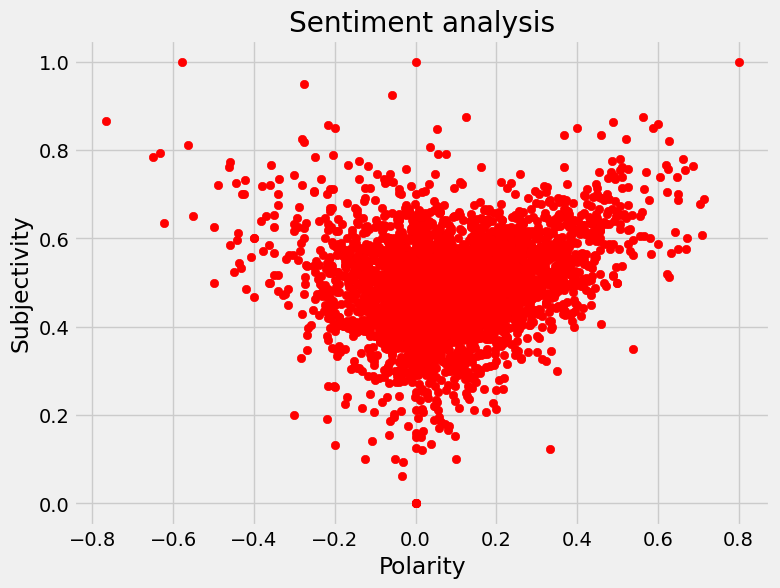

In [ ]:
# Sentiment analysis in a figure
plt.figure(figsize=(8,6))
for i in tqdm(range(0, clean_df.shape[0])):
  plt.scatter(clean_df["polarity"][i], clean_df["subjectivity"][i], color='red')

plt.title('Sentiment analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
#he percentages of the positive, negative, and neutral reviews
positive = clean_df[clean_df["analysis"] == "positive"]
neutral = clean_df[clean_df["analysis"] == "neutral"]
negative = clean_df[clean_df["analysis"] == "negative"]

print("percentage of positive ", positive.shape[0]/clean_df.shape[0])

print("percentage of neutral ", neutral.shape[0]/clean_df.shape[0])

print("percentage of negative ", negative.shape[0]/clean_df.shape[0])

percentage of positive  0.7069586914333241
percentage of neutral  0.004435819240365955
percentage of negative  0.28860548932630997


# Only verified reviews (authentic reviews)

In [ ]:
# Collecting only the authentic reviews
verified = clean_df[clean_df.verified == 1]

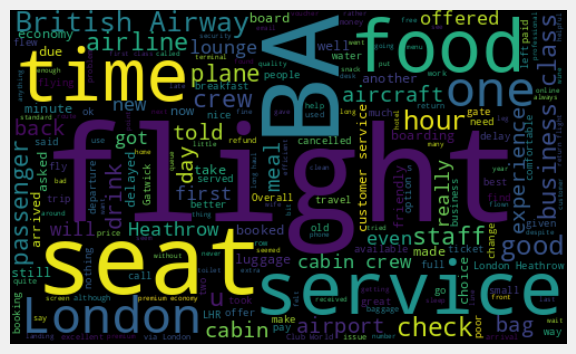

In [ ]:
# Creating the wordcloud of the authentic reviews
all_words = ' '.join([rev for rev in verified["reviews"]])

wordcloud = WordCloud(width=500, height=300, random_state=0, max_font_size=119).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# reseting the index for the verified dataframe
verified.reset_index(inplace=True)

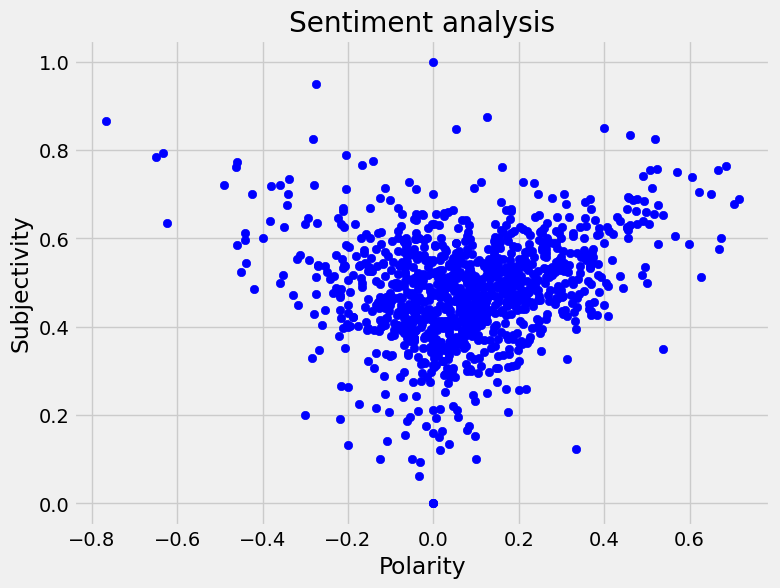

In [ ]:
# Sentiment analysis in a figure for the verified reviews
plt.figure(figsize=(8,6))
for i in range(0, verified.shape[0]):
  plt.scatter(verified["polarity"][i], verified["subjectivity"][i], color='blue')

plt.title('Sentiment analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
# the pourcentage of positive, negative, and neutral reviews of the verified reviews
positive = verified[verified["analysis"] == "positive"]
neutral = verified[verified["analysis"] == "neutral"]
negative = verified[verified["analysis"] == "negative"]

print("percentage of positive ", positive.shape[0]/verified.shape[0])

print("percentage of neutral ", neutral.shape[0]/verified.shape[0])

print("percentage of negative ", negative.shape[0]/verified.shape[0])

percentage of positive  0.6528162511542013
percentage of neutral  0.009233610341643583
percentage of negative  0.3379501385041551
